In [1]:
import os

network_path = "networks/input_csv_example"
n_cores = 3
duration = 1.1

snudda_data = "../../../BasalGangliaData/data/"
assert os.path.isdir(snudda_data), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, snudda_data=snudda_data, random_seed=1337)

# OBS, this is not realistic density of neurons, toy example
cnc.define_striatum(num_dSPN=5, num_iSPN=5, num_FS=5, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=100e-6)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/input_csv_example/network-config.json


In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

Placing neurons
Network path: networks/input_csv_example
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/input_csv_example/network-config.json
Generating 196 points for networks/input_csv_example/mesh/Striatum-cube-mesh-5.711696549584055e-05.obj
n_points = 186, previous close_pairs = 320
n_points = 177, previous close_pairs = 249
n_points = 168, previous close_pairs = 203
n_points = 160, previous close_pairs = 165
n_points = 152, previous close_pairs = 136
n_points = 145, previous close_pairs = 111
n_points = 139, previous close_pairs = 91
n_points = 133, previous close_pairs = 75
n_points = 128, previous close_pairs = 64
n_points = 123, previous close_pairs = 54
n_points = 119, previous close_pairs = 46
n_points = 115, previous close_pairs = 38
n_points = 112, previous close_pairs = 31
n_points = 86, previous close_pairs = 26
Filtering 86 points..
Filtering, keeping inside points: 22 / 86
stop_parallel disabled, to keep pool running.

Execution time: 0.1s
Touc

In [4]:
snd.setup_input(input_config="input_config/csv-input-example.json",
                verbose=False, use_meta_input=False)

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/input_csv_example/network-config.json
Writing input spikes to networks/input_csv_example/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/input_csv_example/network-config.json
Writing spikes to networks/input_csv_example/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 2.9s


In [5]:
os.system(f"nrnivmodl {snudda_data}/neurons/mechanisms")

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../BasalGanglia

0

In [6]:
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path}  --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=3
args: Namespace(action='simulate', path='networks/input_csv_example', network_file=None, input_file=None, output_file=None, time=1.1, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
Using input file networks/input_csv_example/input-spikes.hdf5
args: Namespace(action='simulate', path='networks/input_csv_example', network_file=None, input_file=None, output_file=None, time=1.1, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
Using input file networks/input_csv_example/input-spikes.hdf5
args: Namespace(act

0

In [7]:
print(f"mpiexec -n {n_cores} snudda simulate {network_path}  --time {duration}")

mpiexec -n 3 snudda simulate networks/input_csv_example  --time 1.1


Loading network info from networks/input_csv_example/network-synapses.hdf5
Loading input info from networks/input_csv_example/input-spikes.hdf5
Loading networks/input_csv_example/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Plotted 15 traces (total 15)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/input_csv_example/figures/Network-voltage-trace--FS-iSPN-dSPN.pdf


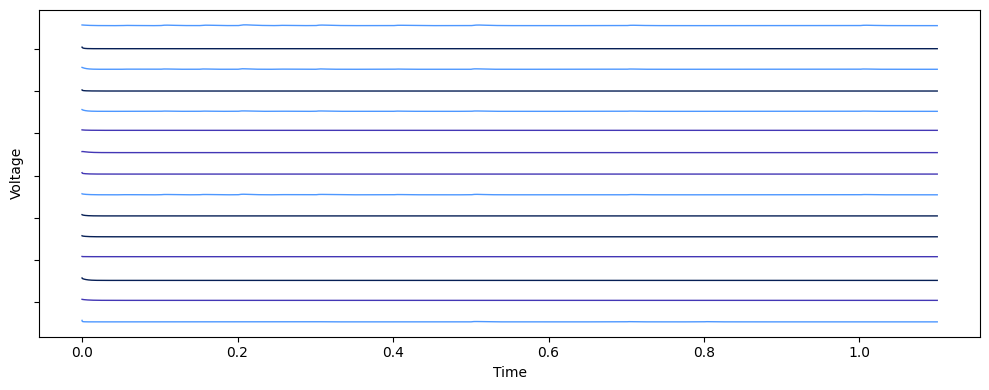

In [8]:
%matplotlib inline

network_file = os.path.join(network_path, "network-synapses.hdf5")
output_file = os.path.join(network_path, "simulation", "output.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=output_file, network_file=network_file, input_file=input_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=100e-3,fig_size=(10,4))

Plotting traces: [0]
Plotted 1 traces (total 15)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/input_csv_example/figures/Network-voltage-trace--dSPN-0.pdf


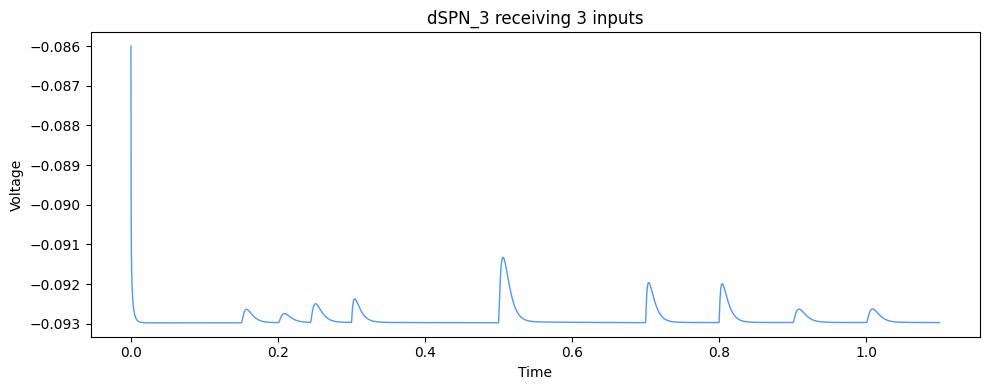

In [9]:
ax = pt.plot_traces(offset=100e-3,fig_size=(10,4), trace_id=0)

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/input_csv_example/network-config.json
Plotting 3 external synapses
Figure written: networks/input_csv_example/figures/input-to-0-dSPN_3.png


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:159: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(z_labels)


<Axes3D: title={'center': 'Input to dSPN_3 (0)'}, xlabel='μm', ylabel='μm', zlabel='μm'>

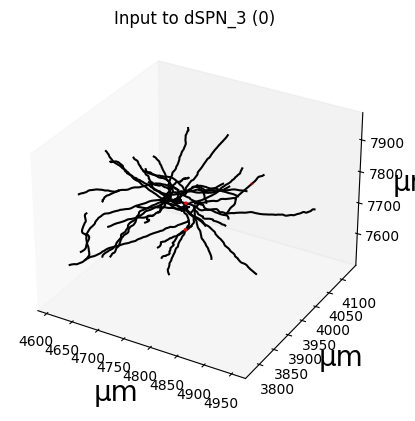

In [10]:
from snudda.plotting.plot_input_locations import SnuddaPlotInputLocations
pil = SnuddaPlotInputLocations(network_path=network_path)
pil.plot_neuron_inputs(neuron_id=0, show_internal_synapses=False)